In [70]:
import numpy as np 
import pandas as pd

In [71]:
base_path = "data/output/"

In [72]:
nedbit_path = "nedbit_features_python_package" #"nedbit_features.csv"
df_nebit_features = pd.read_csv(base_path + nedbit_path, sep=",")
df_nebit_features

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg00394221_FCRL1,1,4113,1,0.905257,2.281636e+03,0.352461,0.227665
1,cg00755661_CTTNBP2NL,1,4077,1,0.894339,2.250929e+03,0.410495,0.227579
2,cg01343097_OR2M1P,1,3916,1,0.676167,2.697290e+03,1.546465,0.227793
3,cg01833436_SDCCAG8,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296
4,cg01833436_AKT3,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296
...,...,...,...,...,...,...,...,...
11751,cg01909024_PAQR7,0,1,3,2.982511,1.573376e+02,0.000007,0.000155
11752,cg02073054_IL19,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000
11753,cg02073054_IL19.1,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000
11754,cg05262634_CDCA8,0,2,3,2.987049,1.558967e+02,0.000007,0.000422


In [39]:
#df_test_probe_genes = pd.read_csv(base_path + "test_probe_genes.csv", sep="\t")
#probe_gene_list = df_test_probe_genes.iloc[:, 0].tolist()
#df_test_probe_genes, len(probe_gene_list), probe_gene_list[:5]

In [40]:
#df_nebit_features_test = df_nebit_features[df_nebit_features["name"].isin(probe_gene_list)]
#df_nebit_features_test.reset_index(drop=True, inplace=True)
#df_nebit_features_test

In [73]:
nebit_features = df_nebit_features.iloc[:, 3:]
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905257,2.281636e+03,0.352461,0.227665
1,1,0.894339,2.250929e+03,0.410495,0.227579
2,1,0.676167,2.697290e+03,1.546465,0.227793
3,1,0.612830,2.922246e+03,1.893043,0.227296
4,1,0.612830,2.922246e+03,1.893043,0.227296
...,...,...,...,...,...
11751,3,2.982511,1.573376e+02,0.000007,0.000155
11752,0,0.000000,6.538936e-305,0.000000,0.000000
11753,0,0.000000,6.538936e-305,0.000000,0.000000
11754,3,2.987049,1.558967e+02,0.000007,0.000422


In [74]:
# normalise NetShort feature

from sklearn.preprocessing import normalize, RobustScaler

netshort = np.array(nebit_features["NetShort"].tolist())
netshort = netshort.reshape(-1, 1)
print(len(netshort), netshort.shape)
transformer = RobustScaler().fit(netshort)
#norm_netshort = normalize(netshort, norm="l2")
norm_netshort = transformer.transform(netshort)
norm_netshort

11756 (11756, 1)


array([[ 0.81468116],
       [ 0.77192887],
       [ 1.39338173],
       ...,
       [-2.36196109],
       [-2.14491155],
       [-2.13550694]])

In [75]:
nebit_features["NetShort"] = norm_netshort
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,1,0.905257,0.814681,0.352461,0.227665
1,1,0.894339,0.771929,0.410495,0.227579
2,1,0.676167,1.393382,1.546465,0.227793
3,1,0.612830,1.706580,1.893043,0.227296
4,1,0.612830,1.706580,1.893043,0.227296
...,...,...,...,...,...
11751,3,2.982511,-2.142905,0.000007,0.000155
11752,0,0.000000,-2.361961,0.000000,0.000000
11753,0,0.000000,-2.361961,0.000000,0.000000
11754,3,2.987049,-2.144912,0.000007,0.000422


In [44]:
df_merged_signals = pd.read_csv("../process_illumina_arrays/data/output/merged_signals.csv", sep="\t", engine="c")
df_merged_signals

,cg23954847_TFE3,cg00000957_NPHP4,cg00001349_MAEL,cg00001364_PROX1,cg00001446_ELOVL1,cg00001534_FAF1,cg00001583_NR5A2,cg00002028_PINK1,cg00002028_PINK1.1,cg00002593_TAS1R3,...,ch.22.533187F_HMOX1,ch.22.569473R_FOXRED2,ch.22.694298R_GRAP2,ch.22.707968R_ADSL,ch.22.728807R_RBX1,ch.22.734399R_EP300,ch.22.740407F_RANGAP1,ch.22.757911F_XRCC6,ch.22.772318F_NAGA,ch.22.909671F_ATXN10
0,0.864672,0.919098,0.931214,0.825985,0.841873,0.905513,0.902962,0.052570,0.052570,0.831665,...,0.042048,0.157289,0.075781,0.038821,0.148307,0.171660,0.044178,0.058824,0.035193,0.129464
1,0.732438,0.884181,0.862162,0.758616,0.782469,0.853061,0.324640,0.091551,0.091551,0.797655,...,0.062322,0.143155,0.129497,0.056417,0.138343,0.172133,0.061292,0.060908,0.066473,0.164508
2,0.870964,0.896988,0.917439,0.798168,0.788342,0.883873,0.064378,0.041799,0.041799,0.831371,...,0.064128,0.155809,0.169524,0.091728,0.174972,0.202347,0.092773,0.067895,0.066007,0.167633
3,0.770894,0.896535,0.923548,0.781703,0.810133,0.898413,0.146580,0.061871,0.061871,0.788763,...,0.051624,0.156234,0.075386,0.058948,0.142429,0.209881,0.061288,0.065006,0.063020,0.174391
4,0.793325,0.900545,0.890331,0.753394,0.816442,0.874389,0.283989,0.044948,0.044948,0.789155,...,0.029399,0.112743,0.047210,0.025311,0.120706,0.158879,0.033180,0.039391,0.030883,0.108496
5,0.771238,0.881966,0.885884,0.706935,0.789394,0.844779,0.052274,0.058234,0.058234,0.768430,...,0.050518,0.144294,0.078152,0.046610,0.170648,0.172923,0.054839,0.068701,0.098243,0.220538
6,0.818622,0.858326,0.837925,0.785126,0.798059,0.887452,0.191977,0.062295,0.062295,0.477000,...,0.068426,0.181990,0.159486,0.043905,0.184506,0.147676,0.056958,0.065455,0.091866,0.168706
7,0.719042,0.888057,0.864124,0.758313,0.781905,0.884818,0.390451,0.088711,0.088711,0.825365,...,0.068621,0.154173,0.102731,0.059434,0.186476,0.138332,0.082228,0.073743,0.098911,0.185174
8,0.775340,0.892561,0.908382,0.771167,0.835124,0.877090,0.669288,0.088306,0.088306,0.788113,...,0.052823,0.139850,0.063330,0.047713,0.147007,0.168616,0.062604,0.070394,0.072000,0.148210
9,0.430085,0.882614,0.871273,0.797262,0.808716,0.878163,0.145391,0.072168,0.072168,0.823876,...,0.070245,0.171744,0.099462,0.066413,0.207633,0.188526,0.064079,0.077805,0.120990,0.165222


In [45]:
feature_names = df_nebit_features["name"].tolist()
feature_names[:5]

['cg00394221_FCRL1',
 'cg00755661_CTTNBP2NL',
 'cg01343097_OR2M1P',
 'cg01833436_SDCCAG8',
 'cg01833436_AKT3']

In [46]:
dnam_signals = df_merged_signals[feature_names]
dnam_signals

,cg00394221_FCRL1,cg00755661_CTTNBP2NL,cg01343097_OR2M1P,cg01833436_SDCCAG8,cg01833436_AKT3,cg01943585_CTTNBP2NL,cg01971755_KIF21B,cg02395088_KIF21B,cg03138364_PBX1,cg04012896_KIF21B,...,cg01061626_KIAA2013,cg01061626_KIAA2013.1,cg01804284_NFYC,cg01804284_NFYC.1,cg01804284_LOC100130557,cg01909024_PAQR7,cg02073054_IL19,cg02073054_IL19.1,cg05262634_CDCA8,cg03524755_FAM73A
0,0.884223,0.831418,0.867871,0.872817,0.872817,0.897189,0.817078,0.820187,0.794427,0.857376,...,0.540654,0.540654,0.144788,0.144788,0.144788,0.815616,0.726304,0.726304,0.114019,0.652632
1,0.854487,0.778697,0.857484,0.789144,0.789144,0.821908,0.773998,0.730111,0.737284,0.823814,...,0.529972,0.529972,0.213883,0.213883,0.213883,0.789967,0.622590,0.622590,0.115849,0.673340
2,0.893978,0.836100,0.886596,0.889303,0.889303,0.888078,0.819319,0.812884,0.786059,0.889765,...,0.539338,0.539338,0.189343,0.189343,0.189343,0.865481,0.652632,0.652632,0.108110,0.664790
3,0.877296,0.810414,0.873939,0.840657,0.840657,0.883874,0.784236,0.796373,0.751683,0.839087,...,0.499012,0.499012,0.195677,0.195677,0.195677,0.838889,0.646757,0.646757,0.128333,0.619177
4,0.881579,0.807439,0.853442,0.844308,0.844308,0.865828,0.783336,0.751091,0.739205,0.840999,...,0.565250,0.565250,0.193360,0.193360,0.193360,0.839916,0.655718,0.655718,0.138480,0.630584
5,0.910560,0.839523,0.823514,0.841471,0.841471,0.890614,0.772965,0.777069,0.738706,0.837281,...,0.553235,0.553235,0.155988,0.155988,0.155988,0.832341,0.592405,0.592405,0.118957,0.638336
6,0.858944,0.825842,0.847107,0.849658,0.849658,0.865500,0.799981,0.782407,0.777952,0.843815,...,0.529973,0.529973,0.208076,0.208076,0.208076,0.818169,0.696400,0.696400,0.105784,0.705927
7,0.851166,0.863688,0.919482,0.833542,0.833542,0.871604,0.746870,0.787337,0.758583,0.816869,...,0.521595,0.521595,0.199714,0.199714,0.199714,0.816099,0.684647,0.684647,0.132962,0.622278
8,0.897877,0.844439,0.842623,0.833725,0.833725,0.876568,0.820771,0.798011,0.706786,0.871555,...,0.547310,0.547310,0.269540,0.269540,0.269540,0.827879,0.727731,0.727731,0.106625,0.676087
9,0.884387,0.817666,0.810016,0.834115,0.834115,0.833997,0.818702,0.787915,0.785772,0.836500,...,0.579950,0.579950,0.150153,0.150153,0.150153,0.813686,0.638726,0.638726,0.130550,0.668094


In [47]:
dnam_signals_transpose = dnam_signals.transpose()
dnam_signals_transpose

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
cg00394221_FCRL1,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
cg00755661_CTTNBP2NL,0.831418,0.778697,0.836100,0.810414,0.807439,0.839523,0.825842,0.863688,0.844439,0.817666,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
cg01343097_OR2M1P,0.867871,0.857484,0.886596,0.873939,0.853442,0.823514,0.847107,0.919482,0.842623,0.810016,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
cg01833436_SDCCAG8,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
cg01833436_AKT3,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg01909024_PAQR7,0.815616,0.789967,0.865481,0.838889,0.839916,0.832341,0.818169,0.816099,0.827879,0.813686,...,0.774770,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859
cg02073054_IL19,0.726304,0.622590,0.652632,0.646757,0.655718,0.592405,0.696400,0.684647,0.727731,0.638726,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
cg02073054_IL19.1,0.726304,0.622590,0.652632,0.646757,0.655718,0.592405,0.696400,0.684647,0.727731,0.638726,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
cg05262634_CDCA8,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,0.130550,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [48]:
dnam_signals_transpose.to_csv("../process_illumina_arrays/data/output/" + "dnam_signals_transpose.csv")
dnam_signals_transpose = dnam_signals_transpose.reset_index()
dnam_signals_transpose

,index,0,1,2,3,4,5,6,7,8,...,24,25,26,27,28,29,30,31,32,33
0,cg00394221_FCRL1,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,cg00755661_CTTNBP2NL,0.831418,0.778697,0.836100,0.810414,0.807439,0.839523,0.825842,0.863688,0.844439,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,cg01343097_OR2M1P,0.867871,0.857484,0.886596,0.873939,0.853442,0.823514,0.847107,0.919482,0.842623,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
3,cg01833436_SDCCAG8,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,cg01833436_AKT3,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,cg01909024_PAQR7,0.815616,0.789967,0.865481,0.838889,0.839916,0.832341,0.818169,0.816099,0.827879,...,0.774770,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859
11752,cg02073054_IL19,0.726304,0.622590,0.652632,0.646757,0.655718,0.592405,0.696400,0.684647,0.727731,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11753,cg02073054_IL19.1,0.726304,0.622590,0.652632,0.646757,0.655718,0.592405,0.696400,0.684647,0.727731,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11754,cg05262634_CDCA8,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [49]:
dnam_features = dnam_signals_transpose.iloc[:, 1:]
dnam_features

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.884223,0.854487,0.893978,0.877296,0.881579,0.910560,0.858944,0.851166,0.897877,0.884387,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,0.831418,0.778697,0.836100,0.810414,0.807439,0.839523,0.825842,0.863688,0.844439,0.817666,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,0.867871,0.857484,0.886596,0.873939,0.853442,0.823514,0.847107,0.919482,0.842623,0.810016,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
3,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,0.872817,0.789144,0.889303,0.840657,0.844308,0.841471,0.849658,0.833542,0.833725,0.834115,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,0.815616,0.789967,0.865481,0.838889,0.839916,0.832341,0.818169,0.816099,0.827879,0.813686,...,0.774770,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859
11752,0.726304,0.622590,0.652632,0.646757,0.655718,0.592405,0.696400,0.684647,0.727731,0.638726,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11753,0.726304,0.622590,0.652632,0.646757,0.655718,0.592405,0.696400,0.684647,0.727731,0.638726,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11754,0.114019,0.115849,0.108110,0.128333,0.138480,0.118957,0.105784,0.132962,0.106625,0.130550,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [76]:
df_nebit_features

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff
0,cg00394221_FCRL1,1,4113,1,0.905257,2.281636e+03,0.352461,0.227665
1,cg00755661_CTTNBP2NL,1,4077,1,0.894339,2.250929e+03,0.410495,0.227579
2,cg01343097_OR2M1P,1,3916,1,0.676167,2.697290e+03,1.546465,0.227793
3,cg01833436_SDCCAG8,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296
4,cg01833436_AKT3,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296
...,...,...,...,...,...,...,...,...
11751,cg01909024_PAQR7,0,1,3,2.982511,1.573376e+02,0.000007,0.000155
11752,cg02073054_IL19,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000
11753,cg02073054_IL19.1,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000
11754,cg05262634_CDCA8,0,2,3,2.987049,1.558967e+02,0.000007,0.000422


In [77]:
#nebit_dnam_features = pd.concat([nebit_features, dnam_signals_transpose.iloc[:, 1:]], axis=1)
nebit_dnam_features = pd.concat([df_nebit_features, dnam_features], axis=1)
nebit_dnam_features

,name,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,...,24,25,26,27,28,29,30,31,32,33
0,cg00394221_FCRL1,1,4113,1,0.905257,2.281636e+03,0.352461,0.227665,0.884223,0.854487,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,cg00755661_CTTNBP2NL,1,4077,1,0.894339,2.250929e+03,0.410495,0.227579,0.831418,0.778697,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,cg01343097_OR2M1P,1,3916,1,0.676167,2.697290e+03,1.546465,0.227793,0.867871,0.857484,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
3,cg01833436_SDCCAG8,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296,0.872817,0.789144,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,cg01833436_AKT3,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296,0.872817,0.789144,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,cg01909024_PAQR7,0,1,3,2.982511,1.573376e+02,0.000007,0.000155,0.815616,0.789967,...,0.774770,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859
11752,cg02073054_IL19,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000,0.726304,0.622590,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11753,cg02073054_IL19.1,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000,0.726304,0.622590,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11754,cg05262634_CDCA8,0,2,3,2.987049,1.558967e+02,0.000007,0.000422,0.114019,0.115849,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [52]:
nebit_dnam_features.to_csv("data/output/nebit_dnam_features", sep=",", index=None)

In [79]:
nebit_dnam_features_embeddings = nebit_dnam_features.iloc[:, 1:]
nebit_dnam_features_embeddings

,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,...,24,25,26,27,28,29,30,31,32,33
0,1,4113,1,0.905257,2.281636e+03,0.352461,0.227665,0.884223,0.854487,0.893978,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,1,4077,1,0.894339,2.250929e+03,0.410495,0.227579,0.831418,0.778697,0.836100,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,1,3916,1,0.676167,2.697290e+03,1.546465,0.227793,0.867871,0.857484,0.886596,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
3,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296,0.872817,0.789144,0.889303,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,1,4280,1,0.612830,2.922246e+03,1.893043,0.227296,0.872817,0.789144,0.889303,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,0,1,3,2.982511,1.573376e+02,0.000007,0.000155,0.815616,0.789967,0.865481,...,0.774770,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859
11752,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000,0.726304,0.622590,0.652632,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11753,-99,1,0,0.000000,6.538936e-305,0.000000,0.000000,0.726304,0.622590,0.652632,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11754,0,2,3,2.987049,1.558967e+02,0.000007,0.000422,0.114019,0.115849,0.108110,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [80]:
# normalise NetShort feature

from sklearn.preprocessing import normalize, RobustScaler

netshort = np.array(nebit_dnam_features_embeddings["NetShort"].tolist())
netshort = netshort.reshape(-1, 1)
print(len(netshort), netshort.shape)
transformer = RobustScaler().fit(netshort)
#norm_netshort = normalize(netshort, norm="l2")
norm_netshort = transformer.transform(netshort)
norm_netshort

11756 (11756, 1)


array([[ 0.81468116],
       [ 0.77192887],
       [ 1.39338173],
       ...,
       [-2.36196109],
       [-2.14491155],
       [-2.13550694]])

In [81]:
nebit_dnam_features_embeddings["NetShort"] = norm_netshort
nebit_dnam_features_embeddings

,class,degree,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,...,24,25,26,27,28,29,30,31,32,33
0,1,4113,1,0.905257,0.814681,0.352461,0.227665,0.884223,0.854487,0.893978,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,1,4077,1,0.894339,0.771929,0.410495,0.227579,0.831418,0.778697,0.836100,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,1,3916,1,0.676167,1.393382,1.546465,0.227793,0.867871,0.857484,0.886596,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
3,1,4280,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,1,4280,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,0,1,3,2.982511,-2.142905,0.000007,0.000155,0.815616,0.789967,0.865481,...,0.774770,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859
11752,-99,1,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11753,-99,1,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11754,0,2,3,2.987049,-2.144912,0.000007,0.000422,0.114019,0.115849,0.108110,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [82]:
#df_nebit_dnam_features = pd.read_csv("../graph_neural_networks/data/output/df_nebit_dnam_features.csv", sep=",")
#df_nebit_dnam_features

In [84]:
output_gene_ranking_path = "data/output/out_gene_rankings.csv"
#output_gene_ranking_path = "data/output/output_gene_ranking_only_pos_corr_python_package"
df_apu_labels = pd.read_csv(output_gene_ranking_path, sep=" ", header=None)
df_apu_labels

,0,1,2
0,cg00394221_FCRL1,0.832421,1
1,cg00755661_CTTNBP2NL,0.831663,1
2,cg01343097_OR2M1P,0.835457,1
3,cg01833436_SDCCAG8,0.834424,1
4,cg01833436_AKT3,0.834424,1
...,...,...,...
11751,cg01909024_PAQR7,-0.552101,5
11752,cg02073054_IL19,0.810015,1
11753,cg02073054_IL19.1,0.810015,1
11754,cg05262634_CDCA8,-0.552093,5


In [85]:
l_name = list()
l_labels = list()
for i, item in df_nebit_dnam_features.iterrows():
    r_val = item.values
    matched_row = df_apu_labels[df_apu_labels.loc[:, 0] == r_val[0]]
    if len(matched_row.index) > 0:
        l_name.append(r_val[0])
        l_labels.append(matched_row.values[0][2])

df_labels = pd.DataFrame(zip(l_name, l_labels), columns=["feature_name", "labels"])
df_labels

,feature_name,labels
0,cg00394221_FCRL1,1
1,cg00755661_CTTNBP2NL,1
2,cg01343097_OR2M1P,1
3,cg01833436_SDCCAG8,1
4,cg01833436_AKT3,1
...,...,...
11751,cg01909024_PAQR7,5
11752,cg02073054_IL19,1
11753,cg02073054_IL19.1,1
11754,cg05262634_CDCA8,5


In [86]:
labels = df_labels["labels"].tolist()

In [87]:
nebit_features = nebit_dnam_features_embeddings.iloc[:, 2:]
nebit_features

,ring,NetRank,NetShort,HeatDiff,InfoDiff,0,1,2,3,4,...,24,25,26,27,28,29,30,31,32,33
0,1,0.905257,0.814681,0.352461,0.227665,0.884223,0.854487,0.893978,0.877296,0.881579,...,0.786619,0.806122,0.733738,0.840141,0.849497,0.756017,0.620907,0.856155,0.750356,0.828218
1,1,0.894339,0.771929,0.410495,0.227579,0.831418,0.778697,0.836100,0.810414,0.807439,...,0.753828,0.825761,0.761608,0.787943,0.799741,0.792940,0.699203,0.794353,0.719454,0.799737
2,1,0.676167,1.393382,1.546465,0.227793,0.867871,0.857484,0.886596,0.873939,0.853442,...,0.794854,0.806875,0.755603,0.808511,0.814268,0.803220,0.610015,0.846208,0.745212,0.786768
3,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
4,1,0.612830,1.706580,1.893043,0.227296,0.872817,0.789144,0.889303,0.840657,0.844308,...,0.717554,0.577939,0.574938,0.722235,0.703800,0.531066,0.485280,0.664450,0.555493,0.618902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,3,2.982511,-2.142905,0.000007,0.000155,0.815616,0.789967,0.865481,0.838889,0.839916,...,0.774770,0.828462,0.762869,0.835728,0.815610,0.841368,0.856707,0.804209,0.744991,0.819859
11752,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,0.646757,0.655718,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11753,0,0.000000,-2.361961,0.000000,0.000000,0.726304,0.622590,0.652632,0.646757,0.655718,...,0.731472,0.687440,0.713413,0.646589,0.650718,0.687663,0.770848,0.714732,0.622042,0.587461
11754,3,2.987049,-2.144912,0.000007,0.000422,0.114019,0.115849,0.108110,0.128333,0.138480,...,0.123006,0.122630,0.101546,0.127736,0.135981,0.126448,0.136760,0.128142,0.115460,0.121700


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import umap

n_neighbors=20 #10 #5
min_dist=0.8 #0.99 #0.3
metric='correlation'

nebit_dnam_embeddings = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(nebit_features)

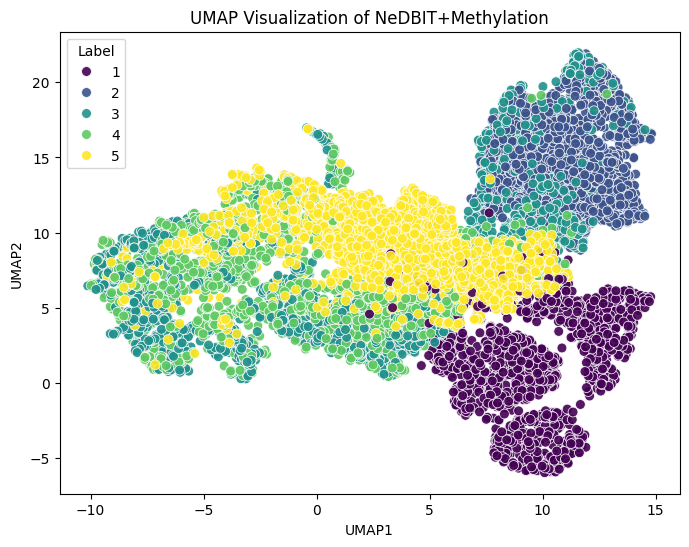

In [89]:
# Create a data frame with UMAP components and labels
umap_data = {"UMAP1": nebit_dnam_embeddings[:, 0], "UMAP2": nebit_dnam_embeddings[:, 1], "Label": labels}
df_umap_load = pd.DataFrame(umap_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df_umap_load, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of NeDBIT+Methylation")
plt.savefig(base_path + "umap_NeDBIT_dnam_features_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()

In [ ]:
'''import torch
import seaborn as sns
import matplotlib.pyplot as plt
import umap

base_path = "naipu_processed_data/only_positive_corr_data/"
base_plot_path = "plots/positive_negative_corr_data/"
embed_conv = torch.load(base_path + "embed_conv.pt")
embed_batch_norm = torch.load(base_path + "embed_batch_norm.pt")
true_labels = torch.load(base_path + "true_labels.pt")
true_labels = [int(item) + 1 for item in true_labels]'''

In [ ]:
'''n_neighbors=10 #10 #5
min_dist=0.99 #0.99 #0.3
metric='correlation'

umap_bn_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_batch_norm)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_bn_embed[:, 0], "UMAP2": umap_bn_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9)
plt.title("UMAP Visualization of node embeddings (GNN)")
plt.savefig(base_plot_path + "umap_batch_norm_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()'''

In [ ]:
'''n_neighbors=10 #5
min_dist=0.99 #0.3
metric='correlation'

umap_conv_embed = umap.UMAP(n_neighbors=n_neighbors,
                       min_dist=min_dist,
                       metric='correlation').fit_transform(embed_conv)

# Create a DataFrame with UMAP components and labels
data = {"UMAP1": umap_conv_embed[:, 0], "UMAP2": umap_conv_embed[:, 1], "Label": true_labels}
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x="UMAP1", y="UMAP2", hue="Label", data=df, palette="viridis", s=50, alpha=0.9) #, palette="viridis", s=50, alpha=0.9
plt.title("UMAP Visualization of node embeddings (GNN)")
plt.savefig(base_plot_path + "umap_conv_{}_{}.pdf".format(n_neighbors, min_dist))
plt.show()'''

In [ ]:
#df_output_gene_rankings = pd.read_csv(base_path + "output_gene_ranking_only_positive_corr", sep="\t", header=None)
#df_output_gene_rankings = df_output_gene_rankings.sort_values(by=[0])
#df_output_gene_rankings.to_csv(base_path + "output_gene_ranking_only_positive_corr_sorted", index=None)
#df_output_gene_rankings

In [ ]:
'''probes = dict()
for i, row in df_output_gene_rankings.iterrows():
    r_values = row.values[0].split(" ")
    name = r_values[0]
    p_name = name.split("_")[0]
    if p_name not in probes:
        probes[p_name] = 1
    else:
        probes[p_name] += 1'''

In [ ]:
#dict(sorted(probes.items(), key=lambda item: item[1], reverse=True))

In [ ]:
'''import pandas as pd
import numpy as np

path = "naipu_processed_data/only_positive_corr_data/"
df_test_data = pd.read_csv(path + "df_nebit_dnam_features.csv", sep="\t", header=None)
df_test_data'''

In [ ]:
'''df_f_name_labels = df_test_data.loc[:, 39:]
df_f_name_labels'''

In [ ]:
'''df_seeds = pd.read_csv(path + "seed_features.tsv", sep="\t", header=None)
df_seeds'''